In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
import numpy as np


class Perceptron(object):

    def __init__(self, learning_rate = 0.01, num_epochs = 50, random_state = 42):
        self.learning_rate  = learning_rate
        self.num_epochs = num_epochs
        self.random_state = random_state


    def fit(self, X, y):
        random_generator = np.random.RandomState(self.random_state)
        self.weights = random_generator.normal(loc = 0, scale = 0.01, size = X.shape[1] + 1)
        self.errors = []

        for iteration in range(self.num_epochs):
            errors = 0
            for (xi, yi) in zip(X, y):
                update = (yi - self.predict(xi)) * self.learning_rate
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0)
            self.errors.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)




In [3]:
# training AND dataset
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_AND = np.array([-1, -1, -1, 1])

AND_function = Perceptron(learning_rate = 0.01, num_epochs = 10, random_state = 42).fit(X_AND, Y_AND)

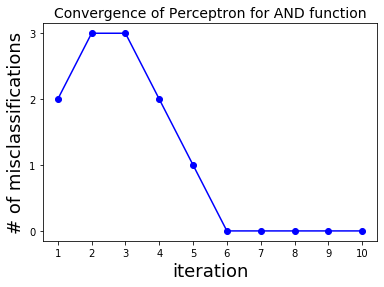

In [4]:
plt.plot(range(1, len(AND_function.errors) + 1), AND_function.errors, marker = 'o', color = 'blue')
plt.title('Convergence of Perceptron for AND function', fontsize = 14)
plt.xlabel('iteration', fontsize = 18)
plt.ylabel('# of misclassifications', fontsize = 18)
plt.xticks(np.arange(1, len(AND_function.errors) + 1, step= 1))
plt.yticks(np.arange(0, len(Y_AND) , step = 1))
plt.show()

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')
    plt.legend(loc = 'upper left')


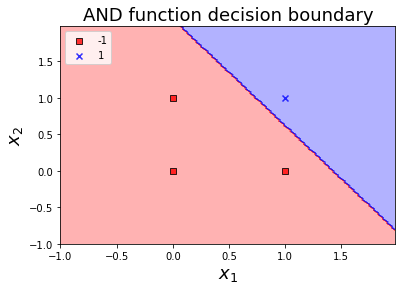

In [6]:
plot_decision_regions(X_AND, Y_AND, classifier=AND_function)
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$x_2$', fontsize = 18)
plt.title('AND function decision boundary', fontsize = 18)
plt.show()

In [140]:
# training AND dataset
X_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_OR = np.array([-1, 1, 1, 1])

OR_function = Perceptron(learning_rate = 0.01, num_epochs = 10, random_state = 42).fit(X_OR, Y_OR)

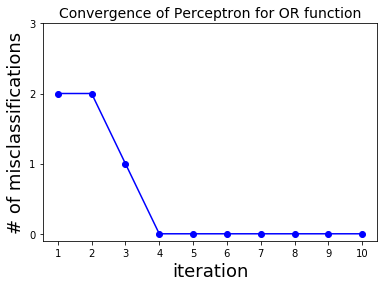

In [141]:
plt.plot(range(1, len(OR_function.errors) + 1), OR_function.errors, marker = 'o', color = 'blue')
plt.title('Convergence of Perceptron for OR function', fontsize = 14)
plt.xlabel('iteration', fontsize = 18)
plt.ylabel('# of misclassifications', fontsize = 18)
plt.xticks(np.arange(1, len(OR_function.errors) + 1, step= 1))
plt.yticks(np.arange(0, len(Y_OR) , step = 1))
plt.show()

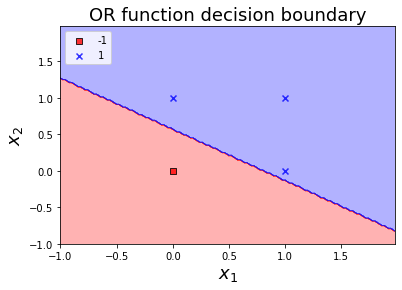

In [142]:
plot_decision_regions(X_OR, Y_OR, classifier=OR_function)
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$x_2$', fontsize = 18)
plt.title('OR function decision boundary', fontsize = 18)
plt.show()

In [143]:
# training AND dataset
X_NOT = np.array([[0], [1]])
Y_NOT = np.array([1, -1])

NOT_function = Perceptron(learning_rate = 0.01, num_epochs = 10, random_state = 42).fit(X_NOT, Y_NOT)

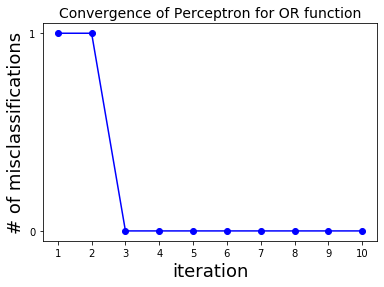

In [144]:
plt.plot(range(1, len(NOT_function.errors) + 1), NOT_function.errors, marker = 'o', color = 'blue')
plt.title('Convergence of Perceptron for OR function', fontsize = 14)
plt.xlabel('iteration', fontsize = 18)
plt.ylabel('# of misclassifications', fontsize = 18)
plt.xticks(np.arange(1, len(NOT_function.errors) + 1, step= 1))
plt.yticks(np.arange(0, len(Y_NOT) , step = 1))
plt.show()

In [145]:
import mlxtend.plotting as mltxtendplt

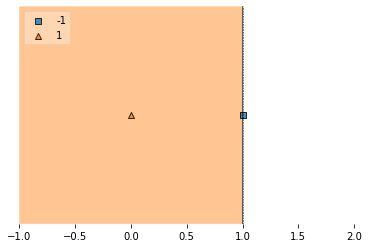

In [146]:
mltxtendplt.plot_decision_regions(X_NOT, Y_NOT, clf = NOT_function, legend = 2)
plt.show()

In [147]:
# training AND dataset
X_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_XOR = np.array([-1, 1, 1, -1])

XOR_function = Perceptron(learning_rate = 0.01, num_epochs = 10, random_state = 42).fit(X_XOR, Y_XOR)

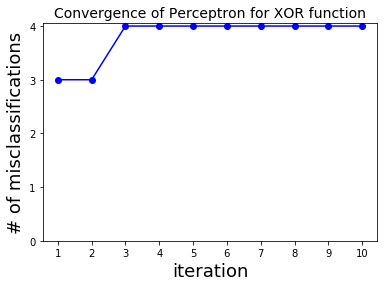

In [148]:
plt.plot(range(1, len(XOR_function.errors) + 1), XOR_function.errors, marker = 'o', color = 'blue')
plt.title('Convergence of Perceptron for XOR function', fontsize = 14)
plt.xlabel('iteration', fontsize = 18)
plt.ylabel('# of misclassifications', fontsize = 18)
plt.xticks(np.arange(1, len(XOR_function.errors) + 1, step= 1))
plt.yticks(np.arange(0, len(Y_XOR) + 1, step = 1))
plt.show()

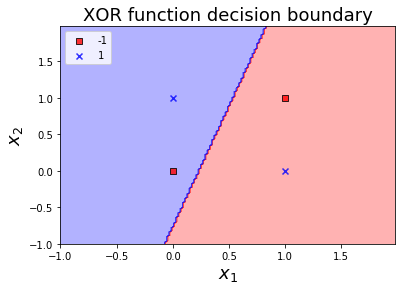

In [149]:
plot_decision_regions(X_XOR, Y_XOR, classifier=XOR_function)
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$x_2$', fontsize = 18)
plt.title('XOR function decision boundary', fontsize = 18)
plt.show()

In [7]:
import sklearn.datasets as datasets

In [8]:
X, y = datasets.load_digits(return_X_y=True)

In [9]:
some_digit = X[0]

In [10]:
some_digit.shape

(64,)

In [11]:
some_image = some_digit.reshape(8, 8)

In [12]:
some_image.shape

(8, 8)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

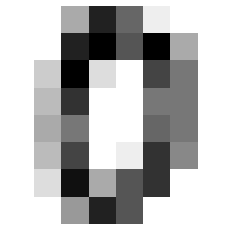

In [14]:
plt.imshow(some_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [15]:
iris = datasets.load_iris()

In [16]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [17]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
X = iris['data'][:100, [0, 2]]

In [19]:
y = iris['target'][:100]

In [20]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
y = np.where(y == 0, -1, 1)

In [23]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [24]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')

In [25]:
plt.scatter(X[50:, 0], X[50:, 1], color = 'blue', marker = 'x', label = 'versicolor')

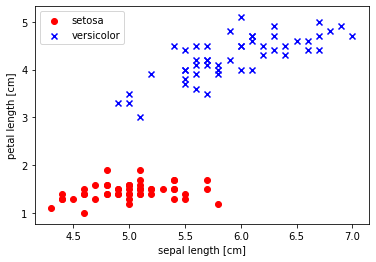

In [26]:
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [27]:
iris_perceptron = Perceptron(learning_rate = 0.1, num_epochs= 10).fit(X, y)

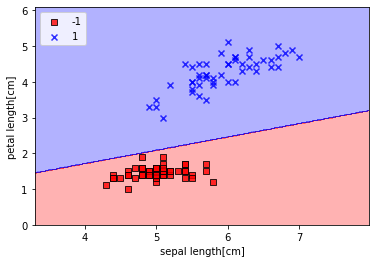

In [28]:
plot_decision_regions(X, y, classifier = iris_perceptron)
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.show()